# Logistic regression



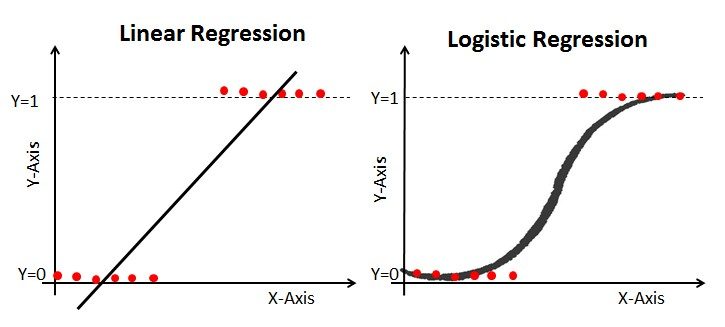



В машинном обучении задачей классификации называется ситуация, когда в качестве целевой переменнной $y$ (переменной которую мы хотим предсказать) выступает категориальная переменная. Это означает, что данная переменная задает разбиение нашего датасета на классы, которых может быть как 2, так и больше. 
   
   Нашей задачей в таком случае становится построение алгоритма $a(x)$, который бы смог отделить классы друг от друга в пространстве признаков, или что тоже самое провести разделяющую поверхность между классами.

Начнем с задачи бинарной классификации.

В линейном бинарном классификаторе разделяющая поверхность - гиперплоскость, а алгоритм $a(x)$ задается равенством

$$a(x) = sign(w_0 + \sum_{j = 1}^{d}w_jx^j)$$

где 
$w_0$ - свободный коэффициент
$w_1,...,w_d$ - веса
$x^j$ - признаки

Прежде чем обучать алгоритм, нам необходимо выбрать функционал качества $Q(a, X)$ для нашей задачи.

$$Q(a, X) = \frac{1}{n}\sum_{i=1}^{n}L(y_i, a(x_i))$$

где $L(y, a(x))$ - функция потерь

Как известно, выбрав функционалом качества долю неправильных ответов, мы не сможем решать задачу минимизации с помощью градиентных методов. Поэтому мы аппроксимируем функционал качества сверху $$Q(a, X)\le \frac{1}{n} \sum_{i=1}^{n}\tilde L(y_i, a(x_i))$$

где $\tilde L(y_i, a(x_i))$ гладкая  и диффиренцируемая функция

Одним из решений является логистическая функция потерь, которая имеет следующий вид:

$$
\tilde L(y_i, a(x_i)) = - (y_i \log(p_i) + (1 - y_i) \log(1 - p_i))
$$

где $p_i$ - это вероятность принадлежности объекта $x_i$ к классу 1, предсказанная нашим алгоритмом. 

Чтобы получить $p_i$ введем алгоритм линейной регрессии $b(x)$
$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Чтобы получить алгоритм, который возвращает значения из интервала $(0, 1)$, можно обернуть выход алгоритма $b(x)$ в сигмоиду. Сигмоида это любая S - образная функция принимающая значения из $(0, 1)$. Частный случай: логистическая функция, которая имеет следующий вид:

$$
\sigma (z) = \frac{1}{1 + e^{-z}}
$$



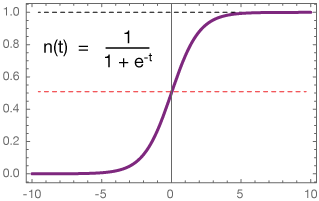

Задача теперь формулируется так:

**Предсказания:** $$
y_{pred}(x, w) = \frac{1}{1 + e^{-\langle x, w \rangle}}
$$

**Лосс (LogLoss):** $$
L(w) = -y\, log\,y_{pred} - (1-y)\,log\,(1-y_{pred})
$$

**Градиент:**
$$
\frac{\partial{L}}{\partial{w}}
= \left(-\frac{y}{y_{pred}} + \frac{1-y}{1-y_{pred}}\right)\frac{\partial{y_{pred}}}{\partial{w}}
$$

$$
\frac{\partial{y_{pred}}}{\partial{w}} = \frac{1}{(1+e^{-\langle x, w \rangle})^2} e^{-\langle x, w \rangle} (-x) = -y_{pred}(1-y_{pred})x
$$

$$
\frac{\partial{L}}{\partial{w}} = (y_{pred} - y) x
$$

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv('titanic.csv')

In [3]:
X = Data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = Data['Survived']

### 1. Data Imputing

In [4]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Пропуски есть в признаках `Age` и `Embarked`.

`Age` вещественный признак. Заполним пропуски в признаке `Age` средним значением.

Признак `Embarked` категориальный. Заполним пропуск в признаке `Embarked` новым значениемем. 

In [5]:
X.Age.fillna(X.Age.mean(), inplace = True)
X.Embarked.fillna('None',  inplace = True)

### 2. Feature Engineering

В данных есть категориальные признаки Sex и Embarked со строковыми значениями.
`Sex` - бинарный признак, заменим ``male`` на 1, а `female` на 0

In [6]:
X.Sex.unique(), X.Embarked.unique()

(array(['male', 'female'], dtype=object),
 array(['S', 'C', 'Q', 'None'], dtype=object))

In [7]:
X.loc[:, 'Sex'] = X['Sex'].map({'male': 1, 'female':0})

In [8]:
X = pd.get_dummies(X, columns=['Embarked'])

### 3. Splitting and scaling

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 4. Fitting a model

Будем обучать самый простой бинарный классификатор — логистическую регрессию. 

Используем готовую реализацию LogisticRegression из scikit-learn.

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression()

У обученной логистической регрессии есть два аттрибута: `coef_` и `intercept_`, которые соответствуют весам $w$ и $w_0$. 

Это и есть результат обучения логистической регрессии. 


Посмотрим на то, какие признаки оказались наиболее важными с точки зрения обученной модели. Для этого визуализируем веса, соответствующие признакам. Если признаки отмасштабированы, то чем больше вес по модулю - тем более сильным является признак.

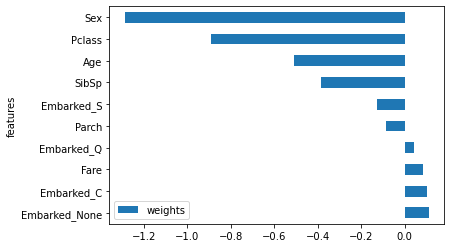

In [12]:

sorted_weights = sorted(zip(clf.coef_.ravel(), X.columns), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
df = pd.DataFrame({'features': features, 'weights':weights})
ax = df.plot.barh(x='features', y='weights', rot=0, )

Посчитаем с помощью аттрибутов `coef_` и `intercept_` (с помощью всё той же обученной ранее логистической регрессии)  предсказание вероятности принадлежности объекта к положительному классу для тестовой части.

Для этого применим логистическую функцию к  $ w_0 + <w, x>$

Реализуем логистическую функцию и построим её график.

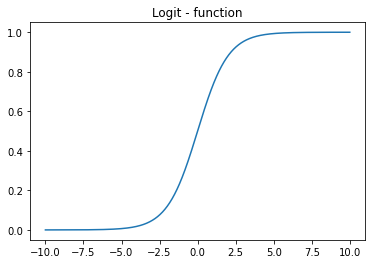

In [13]:

from matplotlib import pyplot as plt

x = np.linspace(-10, 10, 1000)

def logistic_function(x):
    return 1 / (1 + np.exp(-x))

plt.title('Logit - function')
plt.plot(x, logistic_function(x))
plt.show()

Предсказание вероятности принадлежности объекта к положительному классу для тестовой части вычислим с помощью матричного произведения в numpy

In [14]:
pred_prob = np.ravel(logistic_function(np.dot(X_test, clf.coef_.T) + clf.intercept_))

Вычислить предсказание вероятности принадлежности объекта к положительному классу можно и с помощью метода predict_proba

In [15]:
pred_predict_proba = clf.predict_proba(X_test)[:, 1]

Убедимся, что предсказанные значения совпадают

In [16]:
np.all([pred_prob, pred_predict_proba])

True

Чтобы получить в качестве предсказания метки классов, можно предсказанные вероятности принадлежности объекта к положительному классу бинаризовать по порогу (например по порогу 0.5)

Бинаризуем по порогу 0.5 и посчитаем долю правильных ответов (accuracy) на тестовой выборке.

In [17]:
np.mean((pred_prob > 0.5) == Y_test)

0.7873134328358209

Для предсказания меток классов в sklearn есть метод predict.

In [18]:
pred = clf.predict(X_test)
np.mean(pred == Y_test)

0.7873134328358209

Таким образом, обучение логистической регрессии — настройка параметров $w$ и $w_0$.

Применение — подсчёт вероятностей принадлежности положительному классу как применение логистической функции к скалярному произведению признаков и параметров.

Посмотрим на распределение целевого значения

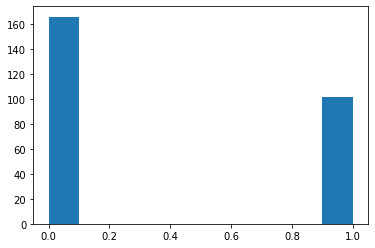

In [19]:
plt.hist(Y_test);

Посмотрим на распределение предсказываемого значения

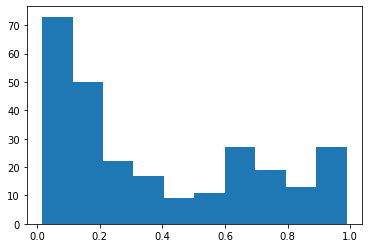

In [20]:
plt.hist(clf.predict_proba(X_test)[:, 1]);

Логистическая регрессия возращает вероятности. Проверим это. Для этого рассмотрим объекты, для которых логистическая регрессия предсказала вероятность принадлежности классу 1 от 0.75 до 0.85. Оценим точность предсказания на этих объектах. При большом числе объектов в выборке точность предсказания должна быть близка к 0.8.

In [21]:
predict_proba = clf.predict_proba(X_test)[:, 1]

In [22]:
np.mean(Y_test[(predict_proba > 0.75) & (predict_proba < 0.85)])

0.75